In [1]:
import numpy as np
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import dwave.inspector
import dimod
import importlib
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
# alternative configuration with real data

means = np.load('means2.npy')
covs = np.load('covs2.npy').T
        
# number of marks
M = 5

# number of nucleosomes
N = 5

# independent propensity
h = defaultdict(int)
for n in range(N):
    for i in range(M):
        x = n * M + i
        h[x] = means[i]

# pair-wise correlation
J = defaultdict(int)
for n in range(N):
    for i in range(M):
        for j in range(i+1, M):
            x = n * M + i
            y = n * M + j
            J[(x, y)] = covs[i, j]  

print(h)
print(J)
print(covs[0, 1])

defaultdict(<class 'int'>, {0: 0.07407407407407407, 1: 0.1111111111111111, 2: 0.2222222222222222, 3: 0.48148148148148145, 4: 0.037037037037037035, 5: 0.07407407407407407, 6: 0.1111111111111111, 7: 0.2222222222222222, 8: 0.48148148148148145, 9: 0.037037037037037035, 10: 0.07407407407407407, 11: 0.1111111111111111, 12: 0.2222222222222222, 13: 0.48148148148148145, 14: 0.037037037037037035, 15: 0.07407407407407407, 16: 0.1111111111111111, 17: 0.2222222222222222, 18: 0.48148148148148145, 19: 0.037037037037037035, 20: 0.07407407407407407, 21: 0.1111111111111111, 22: 0.2222222222222222, 23: 0.48148148148148145, 24: 0.037037037037037035})
defaultdict(<class 'int'>, {(0, 1): 0.029914529914529878, (0, 2): 0.021367521367521385, (0, 3): 0.03988603988603992, (0, 4): -0.0028490028490028496, (1, 2): 0.01282051282051282, (1, 3): 0.059829059829059866, (1, 4): 0.03418803418803419, (2, 3): 0.08119658119658124, (2, 4): 0.02991452991452992, (3, 4): 0.019943019943019953, (5, 6): 0.029914529914529878, (5, 7)

In [30]:
## configuration
#
## number of marks
##M = 12
#M = 3
#
## number of nucleosomes
##N = 20
#N = 5
#
## independent propensity
#h = defaultdict(int)
#propensity = np.random.rand(M)
#for n in range(N):
#    for i, h_i in enumerate(propensity):
#        x = n * M + i
#        h[x] = h_i
#
## pair-wise correlation
#
#pairwise = np.random.rand(M, M)
#for n in range(N):
#    for i in range(M):
#        for j in range(i+1, M):
#            x = n * M + i
#            y = n * M + j
#            J[(x, y)] = pairwise[i, j]
#
#max_correlation_length = 3
#self_correlation = np.random.rand(M, max_correlation_length)
##K = defaultdict(int)
#for n in range(N):
#    for i in range(M):
#        for l in range(max_correlation_length):
#            if n + l < N:
#                x = n * M + i
#                y = (n + l) * M + i
#                J[(x, y)] = self_correlation[i, l]
#        


In [3]:
n_binary_vars = M * N
print(n_binary_vars)

25


In [32]:
# alternative test for h and J
#h = defaultdict(int)
#for i in [0, 3, 6, 9, 12]:
#    h[i] = -0.8
#for i in [1, 4, 7, 10, 13]:
#    h[i] = -0.6
#for i in [2, 5, 8, 11, 14]:
#    h[i] = -0.2
#for i in range(n_binary_vars):
#    h[i] = 0
#h[0] = 1
#
#J = defaultdict(int)
#for j in range(n_binary_vars):
#    for i in range(0, j+1):
#        J[(i, j)] = 0.5
#J_val = -1
## inter-heterosome
#J[(0, 3)] += J_val
#J[(0, 9)] += J_val
#J[(0, 12)] += J_val
#J[(4, 7)] += J_val
#J[(4, 10)] += J_val
#
## intra-heterosome
#J[(3, 4)] += J_val
#J[(9, 10)] += J_val
#J[(9, 11)] += J_val
#J[(10, 11)] += J_val

Encoding of $s_i^n$ to qubit register: counting variable $x = n \cdot M + i$.
So the register looks like this:
$\left[s_1^1, s_2^1, s_3^1, s_1^2, s_2^2, s_3^2, ...\right]$

In [4]:
h_max = max(h, key=h.get)
J_max = max(J, key=J.get)
print(h[h_max])
print(J[J_max])

0.48148148148148145
0.08119658119658124


In [5]:
use_qpu = True
if use_qpu:
    bqm = dimod.BQM.from_ising(h, J)
    sampler = EmbeddingComposite(DWaveSampler())#solver='Advantage2_prototype1.1'))
    response = sampler.sample(
      bqm,
      chain_strength=2,
      num_reads=10,
      annealing_time=100,
      label='CDF',
    )
    dwave.inspector.show(response)
elif True:
    response = dimod.ExactSolver().sample_ising(h, J)
else:
    response = dimod.IdentitySampler().sample_qubo(Q, initial_states=[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])


In [6]:
response

SampleSet(rec.array([([ 1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1], -3.24074074, 1, 0.),
           ([-1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1], -3.1039886 , 1, 0.),
           ([ 1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1], -2.7991453 , 1, 0.),
           ([ 1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1], -2.62535613, 1, 0.),
           ([-1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1], -2.6025641 , 1, 0.),
           ([ 1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1], -2.45726496, 1, 0.),
           ([ 1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1], -2.42592593, 1, 0.),
           ([-1, -1, -1, -1,  1, -1, -1,  1, 

In [7]:
response.lowest()

SampleSet(rec.array([([ 1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1], -3.24074074, 1, 0.)],
          dtype=[('sample', 'i1', (25,)), ('energy', '<f8'), ('num_occurrences', '<i4'), ('chain_break_fraction', '<f8')]), Variables(range(0, 25)), {'timing': {'qpu_sampling_time': 2015.2, 'qpu_anneal_time_per_sample': 100.0, 'qpu_readout_time_per_sample': 80.98, 'qpu_access_time': 17775.17, 'qpu_access_overhead_time': 1342.83, 'qpu_programming_time': 15759.97, 'qpu_delay_time_per_sample': 20.54, 'post_processing_overhead_time': 1967.0, 'total_post_processing_time': 1967.0}, 'problem_id': 'f3e48b56-ee90-4720-be64-c4a3de9e3858', 'problem_label': 'CDF', 'embedding_context': {'embedding': {1: (1602, 5288), 0: (1572,), 2: (1587,), 3: (5258,), 4: (5273,), 6: (497,), 5: (3497,), 7: (482,), 8: (3391, 437), 9: (3482,), 11: (2015, 3851), 10: (2165,), 12: (3881,), 13: (2180,), 14: (3896,), 16: (4458, 728), 15: (4413,), 17: (698,), 18: (4428,), 19: (71

In [8]:
first_result = np.array(list(response.first.sample.values()))

In [9]:
first_result

array([ 1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,
       -1, -1,  1, -1, -1, -1, -1,  1], dtype=int8)

In [10]:
#first_result = np.array([1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

result_matrix = first_result.reshape(N, M).T

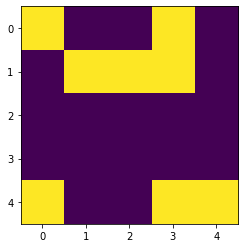

In [11]:
plt.figure()
plt.imshow(result_matrix)

In [79]:
h = defaultdict(int)
J = defaultdict(int)
h[0] = 0
h[1] = 0
J[(0, 1)] = 1
response = dimod.ExactSolver().sample_ising(h, J)
response

SampleSet(rec.array([([-1, -1],  1., 1), ([ 1, -1], -1., 1), ([ 1,  1],  1., 1),
           ([-1,  1], -1., 1)],
          dtype=[('sample', 'i1', (2,)), ('energy', '<f8'), ('num_occurrences', '<i4')]), Variables([0, 1]), {}, 'SPIN')

In [81]:
response.first

Sample(sample={0: 1, 1: -1}, energy=-1.0, num_occurrences=1)